# Heart Sound Classification

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import fnmatch
import librosa
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
SAMPLE_RATE = 16000 #16KHz
MAX_SOUND_CLIP_DURATION=12 #seconds  

In [3]:
set_a=pd.read_csv("set_a.csv")
set_b=pd.read_csv("set_b.csv")

In [4]:
set_a.head(-1)

dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]

In [5]:
set_b.head(-1)

dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
650  noisynormal  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  

[655 rows x 4 columns]

In [6]:
frames = [set_a, set_b]
data_ab=pd.concat(frames)

In [7]:
data_ab.head(-1)

dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
650  noisynormal  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  

[831 rows x 4 columns]

In [8]:
data_ab.describe()

dataset                                              fname   label  \
count      832                                                832     585   
unique       2                                                832       5   
top          b  set_b/Btraining_normal_Btraining_noisynormal_1...  normal   
freq       656                                                  1     351   

           sublabel  
count           149  
unique            2  
top     noisynormal  
freq            120

In [9]:
data_ab['label']=data_ab['label'].replace({'extrahls':'extra_heart_sound'})

In [10]:
data_ab.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

In [11]:
data_ab.drop(["sublabel","dataset"],axis="columns",inplace=True)

In [12]:
data_ab.head(-1)

fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[831 rows x 2 columns]

In [13]:
data_ab["label"].value_counts()

normal               351
murmur               129
extrastole            46
artifact              40
extra_heart_sound     19
Name: label, dtype: int64

In [14]:
data_ab = data_ab.dropna()

In [15]:
data_ab.head(-1)

fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 2 columns]

In [16]:
data_ab = data_ab.reset_index()

In [17]:
data_ab.head(-1)

index                                              fname     label
0        0                   set_a/artifact__201012172012.wav  artifact
1        1                   set_a/artifact__201105040918.wav  artifact
2        2                   set_a/artifact__201105041959.wav  artifact
3        3                   set_a/artifact__201105051017.wav  artifact
4        4                   set_a/artifact__201105060108.wav  artifact
..     ...                                                ...       ...
579    650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
580    651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581    652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582    653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583    654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 3 columns]

In [18]:
data_ab.drop("index",axis="columns",inplace=True)

In [19]:
data_ab.head(-1)

fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
579  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
580  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 2 columns]

In [20]:
data_ab.isnull().sum()

fname    0
label    0
dtype: int64

In [21]:
data_ab.drop(data_ab[data_ab["label"]=="artifact"].index, inplace=True)

In [22]:
data_ab.drop(data_ab[data_ab["label"]=="extrastole"].index, inplace=True)

In [23]:
#get all unique labels
nb_classes=data_ab.label.unique()

print("Number of training examples=", data_ab.shape[0], "  Number of classes=", len(data_ab.label.unique()))
print (nb_classes)

Number of training examples= 499   Number of classes= 3
['extra_heart_sound' 'murmur' 'normal']


In [24]:
data_ab.shape

(499, 2)

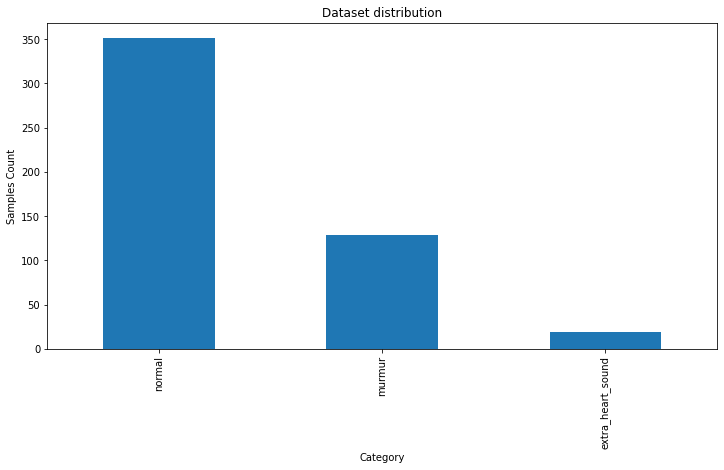

In [25]:
plt.figure(figsize=(12,6))
data_ab.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.xlabel("Category")
plt.ylabel("Samples Count")
plt.show()

In [26]:
print('Min samples per category = ', min(data_ab.label.value_counts()))
print('Max samples per category = ', max(data_ab.label.value_counts()))

Min samples per category =  19
Max samples per category =  351


# 1. Normal

In [27]:
normal_file="set_a/normal__201106111136.wav"

In [28]:
# Load using Librosa
y, sr = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y.shape, sr)

duration: 4.963809523809524
(109452,) 22050


In [29]:
import IPython.display as ipd
ipd.Audio(normal_file) 

Text(0.5, 1.0, 'Normal mfcc')

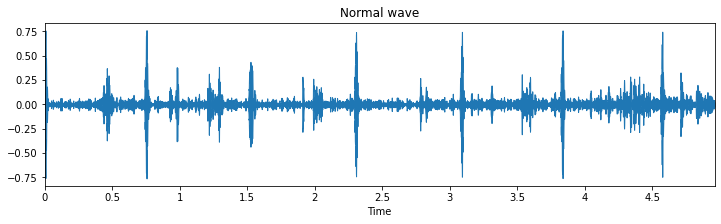

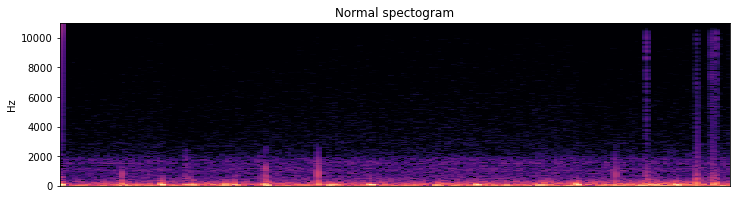

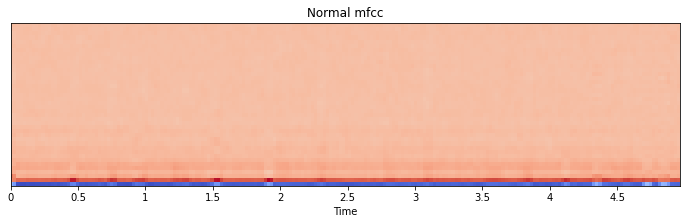

In [30]:
# librosa plot
import librosa.display

plt.figure(figsize=(12, 3))
librosa.display.waveplot(y, sr=sr)
plt.title("Normal wave") 

plt.figure(figsize=(12, 3))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.title("Normal spectogram")

plt.figure(figsize=(12, 3))
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.title("Normal mfcc")

# 2. Murmur

In [31]:
# murmur case
murmur_file="set_a/murmur__201108222231.wav"

In [32]:
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y2)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 5.0
(110250,) 22050


In [33]:
import IPython.display as ipd
ipd.Audio(murmur_file) 

Text(0.5, 1.0, 'Murmur mfcc')

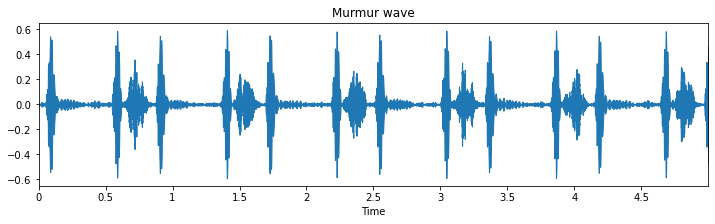

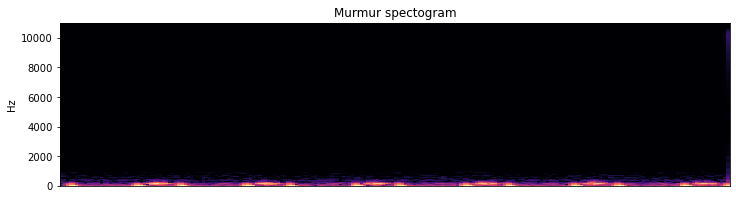

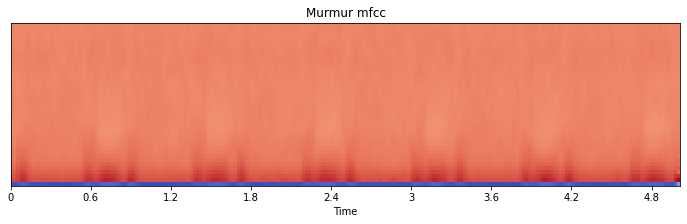

In [34]:
# librosa plot
import librosa.display

plt.figure(figsize=(12, 3))
librosa.display.waveplot(y2, sr=sr2)
plt.title("Murmur wave") 

plt.figure(figsize=(12, 3))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.title("Murmur spectogram")

plt.figure(figsize=(12, 3))
mfccs = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.title("Murmur mfcc")

# 3. Extra Heart Sound

In [35]:
# sample file
extra_heart_sound_file="set_a/extrahls__201101070953.wav"
y3, sr3 = librosa.load(extra_heart_sound_file, duration=5)
dur=librosa.get_duration(y3)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 5.0
(110250,) 22050


In [36]:
import IPython.display as ipd
ipd.Audio(extra_heart_sound_file) 

Text(0.5, 1.0, 'Extra Heart Sound mfcc')

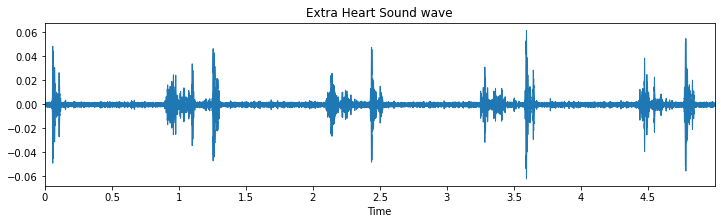

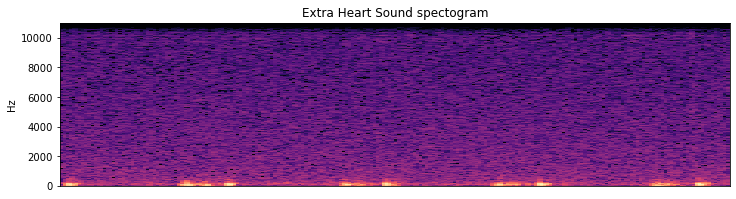

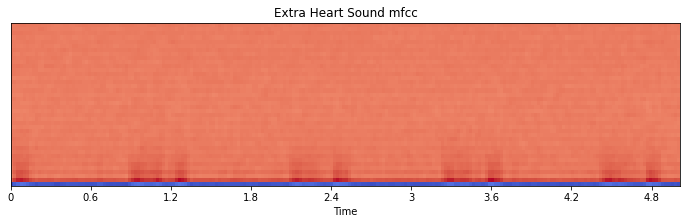

In [37]:
# librosa plot
import librosa.display

plt.figure(figsize=(12, 3))
librosa.display.waveplot(y3, sr=sr3)
plt.title("Extra Heart Sound wave") 

plt.figure(figsize=(12, 3))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.title("Extra Heart Sound spectogram")

plt.figure(figsize=(12, 3))
mfccs = librosa.feature.mfcc(y=y3, sr=sr3, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.title("Extra Heart Sound mfcc")

In [38]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5


# get audio data with a fixed padding, may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            y = audio_norm(y)    
        except Exception as e:
            print("Error encountered while parsing file: ", file)   
        data.append(y)
    return data

In [39]:
# simple encoding of categories, limited to 3 types

# Map label text to integer
CLASSES = ['extra_heart_sound','murmur','normal']
# {'extra_heart_sound': 0, 'murmur': 1, 'normal': 2}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'extra_heart_sound': 0, 'murmur': 1, 'normal': 2}
 
{0: 'extra_heart_sound', 1: 'murmur', 2: 'normal'}


In [40]:
%%time

# load dataset-a
A_folder='set_a/'

# set-a
A_extra_heart_sound_files = fnmatch.filter(os.listdir('set_a'), 'extrahls*.wav')
A_extra_heart_sounds = load_file_data(folder=A_folder,file_names=A_extra_heart_sound_files, duration=MAX_SOUND_CLIP_DURATION)
A_extra_heart_sound_labels = [0 for items in A_extra_heart_sounds]

A_normal_files = fnmatch.filter(os.listdir('set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_murmur_files = fnmatch.filter(os.listdir('set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

print ("loaded dataset-a")

load file  set_a/extrahls__201101070953.wav
fixing audio length : extrahls__201101070953.wav
load file  set_a/extrahls__201101091153.wav
fixing audio length : extrahls__201101091153.wav
load file  set_a/extrahls__201101152255.wav
fixing audio length : extrahls__201101152255.wav
load file  set_a/extrahls__201101160804.wav
fixing audio length : extrahls__201101160804.wav
load file  set_a/extrahls__201101160808.wav
fixing audio length : extrahls__201101160808.wav
load file  set_a/extrahls__201101161027.wav
fixing audio length : extrahls__201101161027.wav
load file  set_a/extrahls__201101241423.wav
fixing audio length : extrahls__201101241423.wav
load file  set_a/extrahls__201101241433.wav
fixing audio length : extrahls__201101241433.wav
load file  set_a/extrahls__201102070251.wav
fixing audio length : extrahls__201102070251.wav
load file  set_a/extrahls__201102071835.wav
fixing audio length : extrahls__201102071835.wav
load file  set_a/extrahls__201102241217.wav
fixing audio length : extr

In [41]:
%%time

# load dataset-b
B_folder='set_b/'

# set-b
B_normal_files = fnmatch.filter(os.listdir('set_b'), 'normal*.wav')  
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir('set_b'), 'murmur*.wav') 
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

print ("loaded dataset-b")

load file  set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio length : normal_noisynormal_101_1305030823364_B.wav
load file  set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio length : normal_noisynormal_101_1305030823364_E.wav
load file  set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio length : normal_noisynormal_104_1305032492469_A.wav
load file  set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio length : normal_noisynormal_105_1305033453095_A.wav
load file  set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio length : normal_noisynormal_105_1305033453095_C.wav
load file  set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio length : normal_noisynormal_106_1306776721273_A.wav
load file  set_b/normal_noisynormal_107_1305654946865_A.wav
fixing audio length : normal_noisynormal_107_1305654946865_A.wav
load file  set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio length : normal_noisynormal_108_1305654420093_A.wav


fixing audio length : normal_noisynormal_154_1306935608852_C.wav
load file  set_b/normal_noisynormal_155_1306935902813_A.wav
load file  set_b/normal_noisynormal_155_1306935902813_C.wav
fixing audio length : normal_noisynormal_155_1306935902813_C.wav
load file  set_b/normal_noisynormal_157_1306937583792_A.wav
fixing audio length : normal_noisynormal_157_1306937583792_A.wav
load file  set_b/normal_noisynormal_157_1306937583792_B.wav
load file  set_b/normal_noisynormal_158_1306947254705_B1.wav
fixing audio length : normal_noisynormal_158_1306947254705_B1.wav
load file  set_b/normal_noisynormal_158_1306947254705_D.wav
load file  set_b/normal_noisynormal_159_1307018640315_A1.wav
fixing audio length : normal_noisynormal_159_1307018640315_A1.wav
load file  set_b/normal_noisynormal_159_1307018640315_B.wav
fixing audio length : normal_noisynormal_159_1307018640315_B.wav
load file  set_b/normal_noisynormal_163_1307104470471_D1.wav
fixing audio length : normal_noisynormal_163_1307104470471_D1.wav

fixing audio length : normal__141_1306520154450_C.wav
load file  set_b/normal__143_1306763822290_B.wav
fixing audio length : normal__143_1306763822290_B.wav
load file  set_b/normal__143_1306763822290_C.wav
fixing audio length : normal__143_1306763822290_C.wav
load file  set_b/normal__145_1307987561278_B.wav
fixing audio length : normal__145_1307987561278_B.wav
load file  set_b/normal__145_1307987561278_C.wav
load file  set_b/normal__146_1306778707532_A.wav
fixing audio length : normal__146_1306778707532_A.wav
load file  set_b/normal__146_1306778707532_B.wav
fixing audio length : normal__146_1306778707532_B.wav
load file  set_b/normal__146_1306778707532_D1.wav
load file  set_b/normal__146_1306778707532_D2.wav
fixing audio length : normal__146_1306778707532_D2.wav
load file  set_b/normal__146_1306778707532_D3.wav
fixing audio length : normal__146_1306778707532_D3.wav
load file  set_b/normal__146_1306778707532_D4.wav
fixing audio length : normal__146_1306778707532_D4.wav
load file  set_b/

fixing audio length : normal__202_1308145175747_C.wav
load file  set_b/normal__202_1308145175747_D.wav
fixing audio length : normal__202_1308145175747_D.wav
load file  set_b/normal__204_1308159229275_C.wav
fixing audio length : normal__204_1308159229275_C.wav
load file  set_b/normal__204_1308159229275_D.wav
fixing audio length : normal__204_1308159229275_D.wav
load file  set_b/normal__206_1308159601959_C.wav
fixing audio length : normal__206_1308159601959_C.wav
load file  set_b/normal__207_1308159792607_C.wav
fixing audio length : normal__207_1308159792607_C.wav
load file  set_b/normal__208_1308159994503_C.wav
fixing audio length : normal__208_1308159994503_C.wav
load file  set_b/normal__209_1308162216750_A.wav
fixing audio length : normal__209_1308162216750_A.wav
load file  set_b/normal__209_1308162216750_A1.wav
fixing audio length : normal__209_1308162216750_A1.wav
load file  set_b/normal__210_1308162935880_B.wav
fixing audio length : normal__210_1308162935880_B.wav
load file  set_b/

load file  set_b/murmur_noisymurmur_162_1307101835989_B_1.wav
fixing audio length : murmur_noisymurmur_162_1307101835989_B_1.wav
load file  set_b/murmur_noisymurmur_162_1307101835989_D.wav
fixing audio length : murmur_noisymurmur_162_1307101835989_D.wav
load file  set_b/murmur_noisymurmur_164_1307106095995_C1.wav
fixing audio length : murmur_noisymurmur_164_1307106095995_C1.wav
load file  set_b/murmur_noisymurmur_165_1307109069581_A.wav
fixing audio length : murmur_noisymurmur_165_1307109069581_A.wav
load file  set_b/murmur_noisymurmur_165_1307109069581_C1.wav
fixing audio length : murmur_noisymurmur_165_1307109069581_C1.wav
load file  set_b/murmur_noisymurmur_165_1307109069581_D.wav
fixing audio length : murmur_noisymurmur_165_1307109069581_D.wav
load file  set_b/murmur_noisymurmur_171_1307971016233_D.wav
fixing audio length : murmur_noisymurmur_171_1307971016233_D.wav
load file  set_b/murmur_noisymurmur_171_1307971016233_F.wav
fixing audio length : murmur_noisymurmur_171_130797101623

fixing audio length : murmur__292_1311185449649_C.wav
load file  set_b/murmur__293_1311680805936_B1.wav
fixing audio length : murmur__293_1311680805936_B1.wav
loaded dataset-b
Wall time: 19.5 s


In [42]:
#combine set-a and set-b 
x_data = np.concatenate((A_extra_heart_sounds,A_normal_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds))

y_data = np.concatenate((A_extra_heart_sound_labels,A_normal_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels))

print ("combined data record: ",len(x_data))

combined data record:  499


In [43]:
seed = 1000
# split data into Train and Test
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, train_size=0.8, random_state=seed, shuffle=True)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.utils import np_utils
from keras.regularizers import l2

In [45]:
from scipy.signal import decimate

x_train = decimate(x_train, 8, axis=1, zero_phase=True)
x_train = decimate(x_train, 4, axis=1, zero_phase=True)

x_test = decimate(x_test, 8, axis=1, zero_phase=True)
x_test = decimate(x_test, 4, axis=1, zero_phase=True)

In [46]:
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

In [47]:
x_train.shape

(399, 6000, 1)

In [48]:
x_test.shape

(100, 6000, 1)

In [49]:
Y_train = np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

In [50]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (499,)
data size of the array: : 499
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  1996
0

audio data shape:  (499, 192000)
data size of the array: : 95808000
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  383232000
[-0.00921869 -0.00900373 -0.01011631 ... -0.00951707 -0.00951707
 -0.00951707]

training data shape:  (399, 6000, 1)
training label shape:  (399,)

test data shape:  (100, 6000, 1)
test label shape:  (100,)


In [51]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=9, activation='relu', input_shape = x_train.shape[1:],kernel_regularizer = l2(0.025)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=4, kernel_size=(9), activation='relu',
                kernel_regularizer = l2(0.05)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=8, kernel_size=(9), activation='relu',
                 kernel_regularizer = l2(0.1)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=(9), activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=(4), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=(1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.75))
model.add(GlobalAvgPool1D())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5992, 4)           40        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1498, 4)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1498, 4)           16        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1490, 4)           148       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 373, 4)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 373, 4)            16        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 365, 8)            2

In [52]:
def batch_generator(x_train, y_train, batch_size):
    """
    Rotates the time series randomly in time
    """
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    full_idx = range(x_train.shape[0])
    
    while True:
        batch_idx = np.random.choice(full_idx, batch_size)
        x_batch = x_train[batch_idx]
        y_batch = y_train[batch_idx]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch
        
weight_saver = ModelCheckpoint('best_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)

In [53]:
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [54]:
%%time
hist = model.fit(batch_generator(x_train, Y_train, 8),
                   epochs=20, steps_per_epoch=1000,
                   validation_data=(x_test, Y_test),
                   callbacks=[weight_saver, annealer],
                   verbose=2)

Epoch 1/20
1000/1000 - 41s - loss: 1.0598 - accuracy: 0.7080 - val_loss: 0.6760 - val_accuracy: 0.7900
Epoch 2/20
1000/1000 - 27s - loss: 0.6804 - accuracy: 0.7642 - val_loss: 0.5970 - val_accuracy: 0.7700
Epoch 3/20
1000/1000 - 26s - loss: 0.5751 - accuracy: 0.7896 - val_loss: 0.5328 - val_accuracy: 0.7900
Epoch 4/20
1000/1000 - 27s - loss: 0.5323 - accuracy: 0.7993 - val_loss: 0.5219 - val_accuracy: 0.8200
Epoch 5/20
1000/1000 - 26s - loss: 0.5001 - accuracy: 0.8201 - val_loss: 0.4891 - val_accuracy: 0.8400
Epoch 6/20
1000/1000 - 26s - loss: 0.4615 - accuracy: 0.8310 - val_loss: 0.5480 - val_accuracy: 0.7900
Epoch 7/20
1000/1000 - 27s - loss: 0.4397 - accuracy: 0.8367 - val_loss: 0.5121 - val_accuracy: 0.8300
Epoch 8/20
1000/1000 - 26s - loss: 0.4198 - accuracy: 0.8449 - val_loss: 0.4470 - val_accuracy: 0.8200
Epoch 9/20
1000/1000 - 26s - loss: 0.4211 - accuracy: 0.8457 - val_loss: 0.4931 - val_accuracy: 0.8200
Epoch 10/20
1000/1000 - 26s - loss: 0.4217 - accuracy: 0.8419 - val_loss:

Text(0.5, 1.0, 'Accuracy Curves')

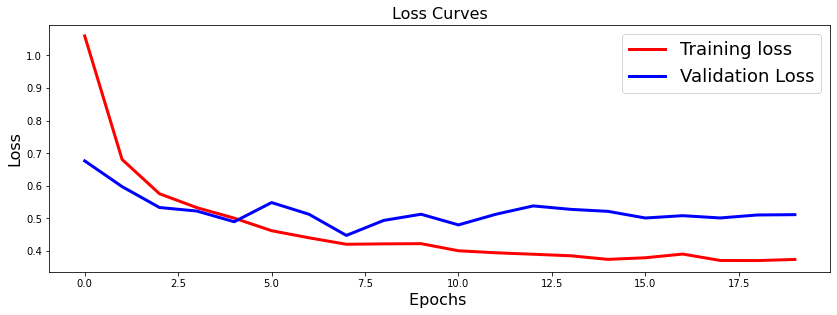

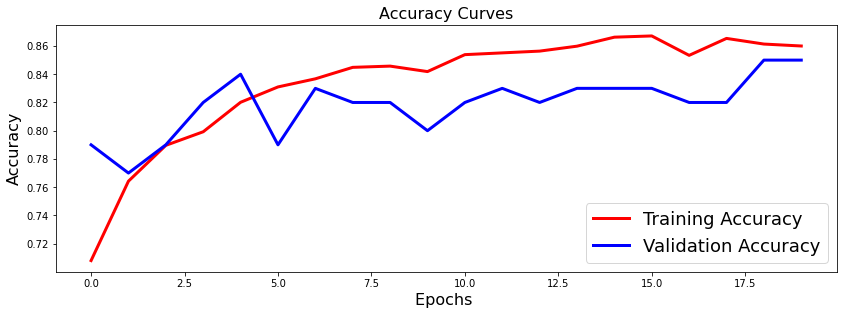

In [55]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(hist.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [56]:
# Save model and weights
model_name = "heartbeat_disease.h5"
model.save(model_name)
print('Saved trained model at %s ' % model_name)

Saved trained model at heartbeat_disease.h5 


In [57]:
scores = model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

4/4 [==============================] - 0s 13ms/step - loss: 0.5108 - accuracy: 0.8500
Test loss: 0.5108088850975037
Test accuracy: 0.8500000238418579


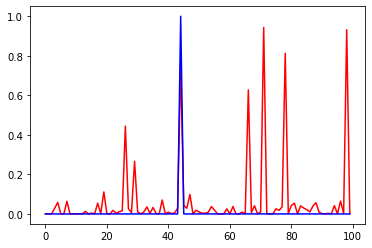

extra_heart_sound


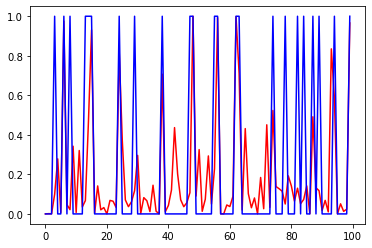

murmur


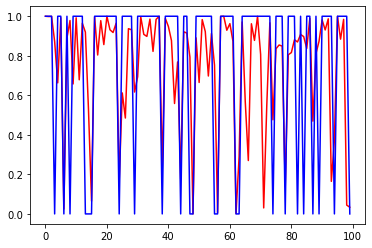

normal


In [58]:
y_hat = model.predict(x_test)
np.set_printoptions(precision=2, suppress=True)
for i in range(3):
    plt.plot(y_hat[:,i], c='r')
    plt.plot(Y_test[:,i], c='b')
    plt.show()
    print(CLASSES[i])

File: [0. 1. 0.], Pred: normal, True: murmur


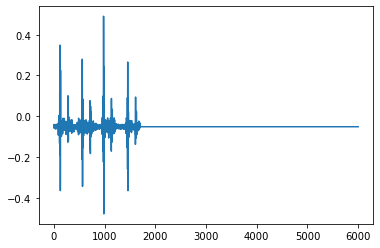

File: [0. 1. 0.], Pred: normal, True: murmur


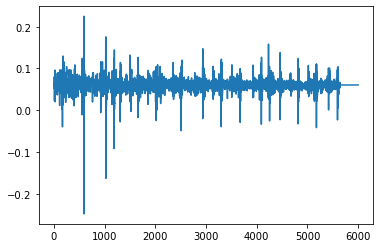

File: [0. 1. 0.], Pred: normal, True: murmur


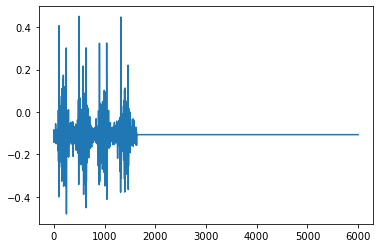

File: [0. 1. 0.], Pred: normal, True: murmur


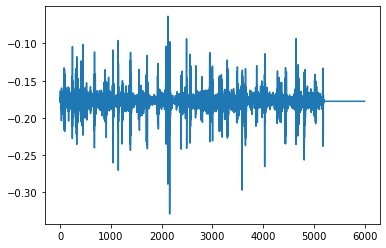

File: [0. 1. 0.], Pred: normal, True: murmur


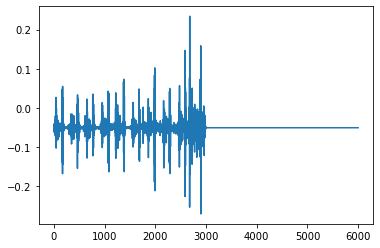

File: [0. 1. 0.], Pred: normal, True: murmur


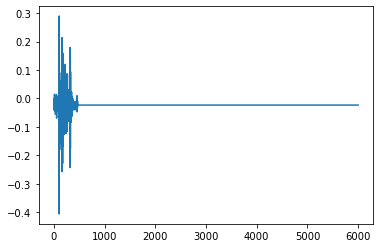

File: [0. 1. 0.], Pred: normal, True: murmur


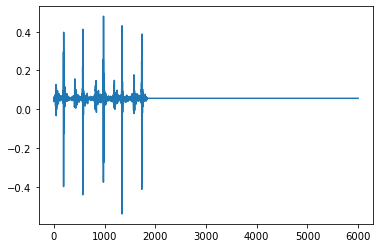

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


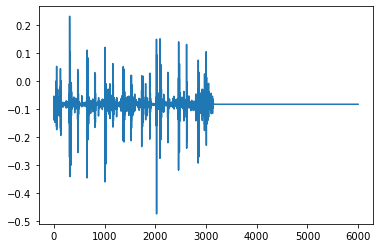

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


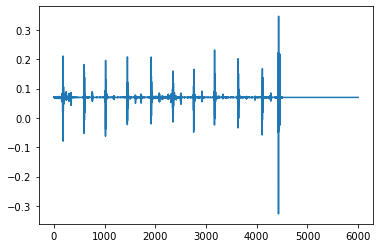

File: [0. 1. 0.], Pred: extra_heart_sound, True: murmur


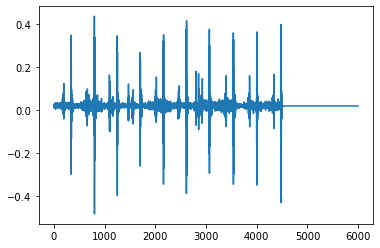

File: [0. 1. 0.], Pred: normal, True: murmur


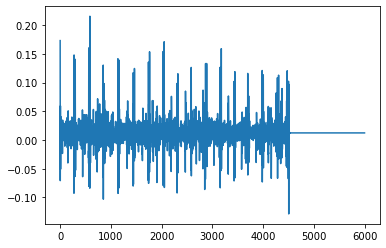

File: [0. 1. 0.], Pred: normal, True: murmur


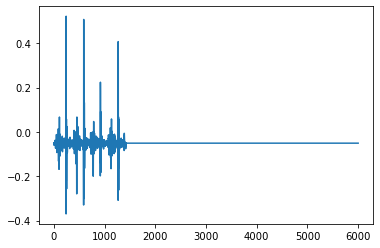

File: [0. 1. 0.], Pred: normal, True: murmur


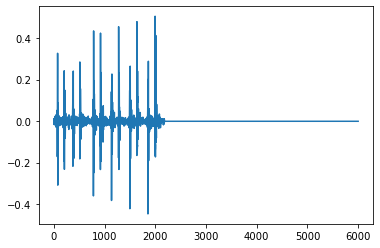

File: [0. 0. 1.], Pred: murmur, True: normal


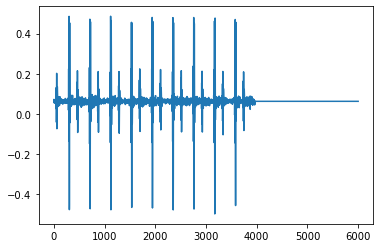

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


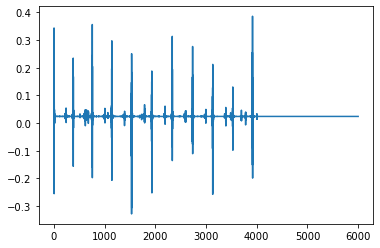

In [59]:
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(Y_test, axis=1)
for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        print("File: {}, Pred: {}, True: {}".format(
            Y_test[i],
            CLASSES[y_pred[i]], CLASSES[y_true[i]]))
        plt.plot(x_test[i])
        plt.show()

File: [0. 0. 1.], Pred: normal, True: normal


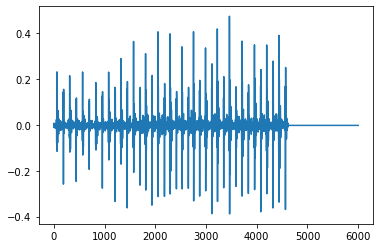

File: [0. 0. 1.], Pred: normal, True: normal


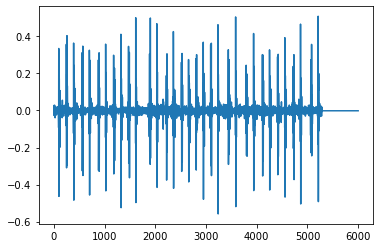

File: [0. 0. 1.], Pred: normal, True: normal


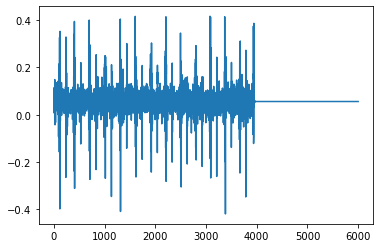

File: [0. 1. 0.], Pred: normal, True: murmur


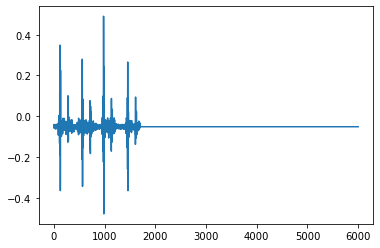

File: [0. 0. 1.], Pred: normal, True: normal


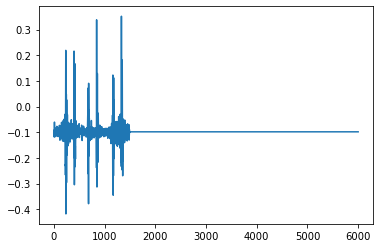

File: [0. 0. 1.], Pred: normal, True: normal


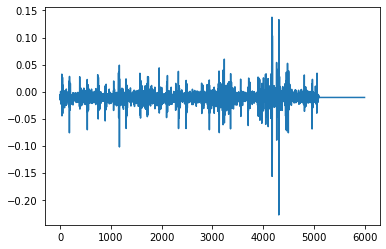

File: [0. 1. 0.], Pred: murmur, True: murmur


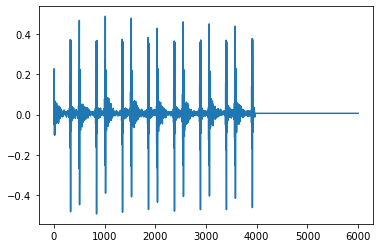

File: [0. 0. 1.], Pred: normal, True: normal


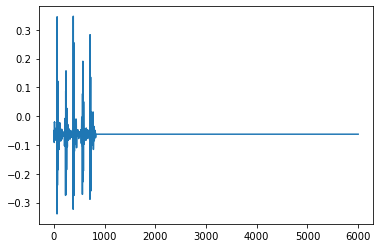

File: [0. 1. 0.], Pred: normal, True: murmur


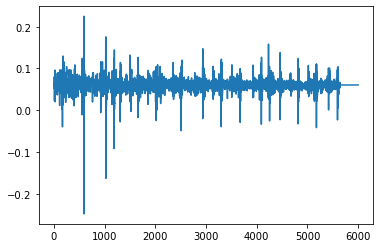

File: [0. 0. 1.], Pred: normal, True: normal


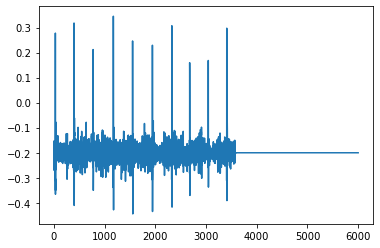

File: [0. 0. 1.], Pred: normal, True: normal


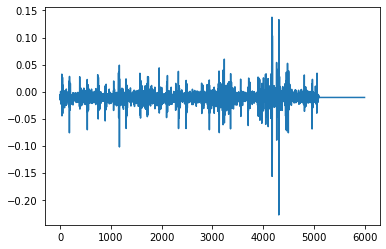

File: [0. 0. 1.], Pred: normal, True: normal


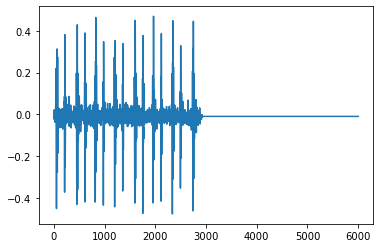

File: [0. 0. 1.], Pred: normal, True: normal


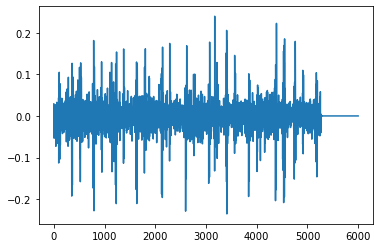

File: [0. 1. 0.], Pred: normal, True: murmur


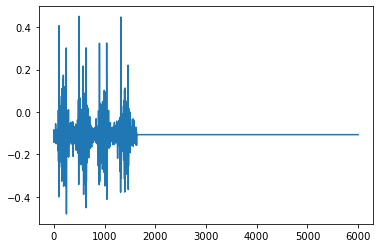

File: [0. 1. 0.], Pred: normal, True: murmur


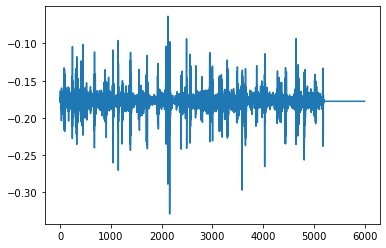

File: [0. 1. 0.], Pred: murmur, True: murmur


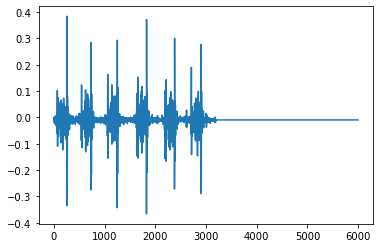

File: [0. 0. 1.], Pred: normal, True: normal


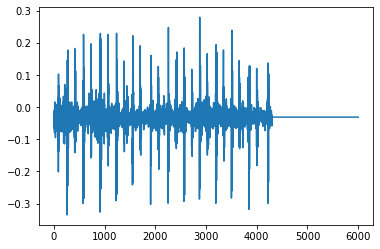

File: [0. 0. 1.], Pred: normal, True: normal


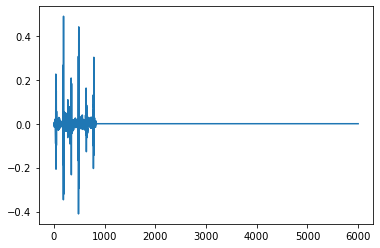

File: [0. 0. 1.], Pred: normal, True: normal


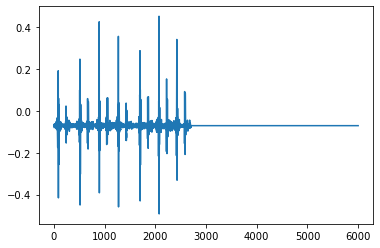

File: [0. 0. 1.], Pred: normal, True: normal


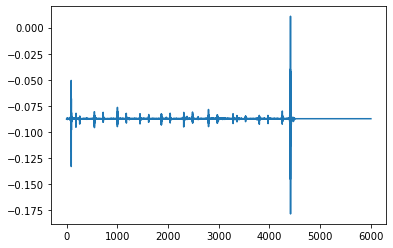

File: [0. 0. 1.], Pred: normal, True: normal


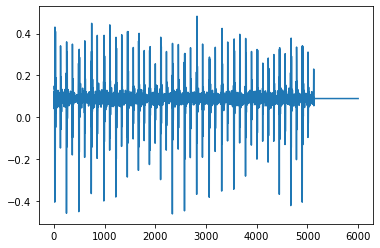

File: [0. 0. 1.], Pred: normal, True: normal


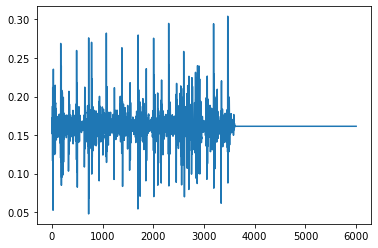

File: [0. 0. 1.], Pred: normal, True: normal


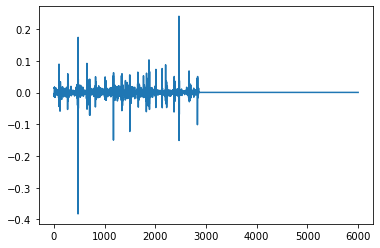

File: [0. 0. 1.], Pred: normal, True: normal


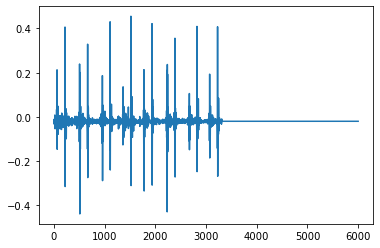

File: [0. 1. 0.], Pred: murmur, True: murmur


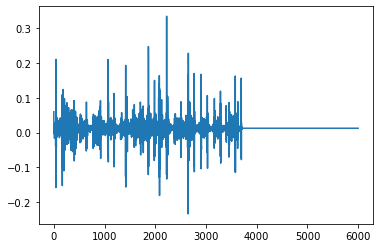

File: [0. 0. 1.], Pred: normal, True: normal


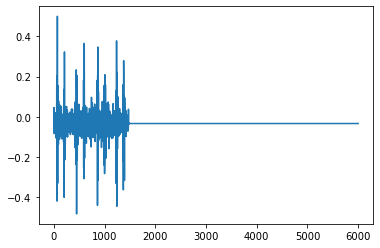

File: [0. 0. 1.], Pred: normal, True: normal


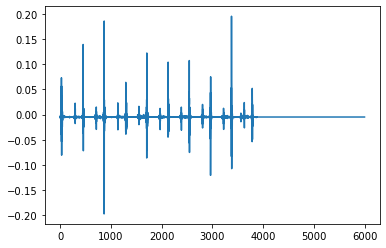

File: [0. 0. 1.], Pred: normal, True: normal


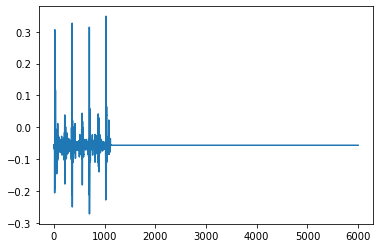

File: [0. 0. 1.], Pred: normal, True: normal


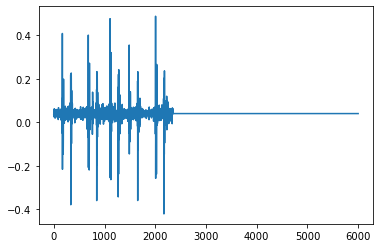

File: [0. 1. 0.], Pred: normal, True: murmur


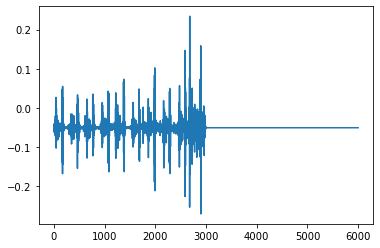

File: [0. 0. 1.], Pred: normal, True: normal


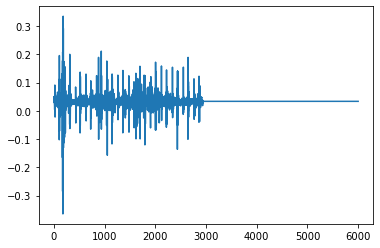

File: [0. 0. 1.], Pred: normal, True: normal


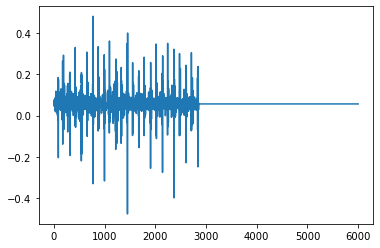

File: [0. 0. 1.], Pred: normal, True: normal


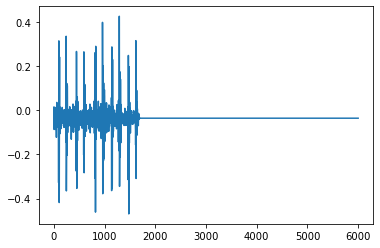

File: [0. 0. 1.], Pred: normal, True: normal


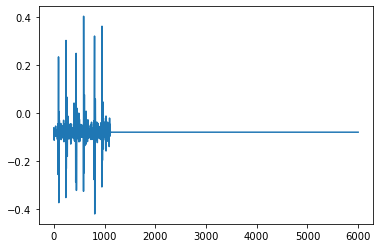

File: [0. 0. 1.], Pred: normal, True: normal


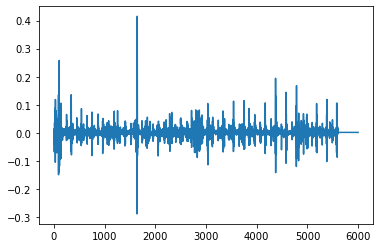

File: [0. 0. 1.], Pred: normal, True: normal


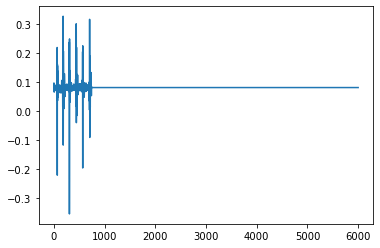

File: [0. 0. 1.], Pred: normal, True: normal


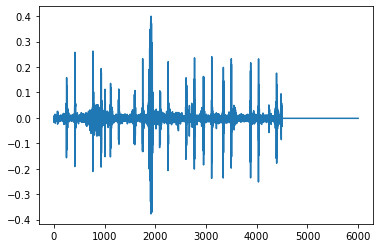

File: [0. 0. 1.], Pred: normal, True: normal


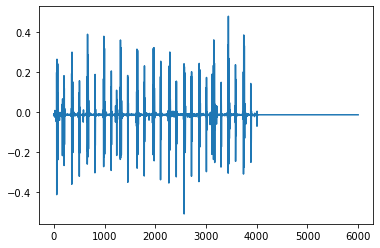

File: [0. 1. 0.], Pred: murmur, True: murmur


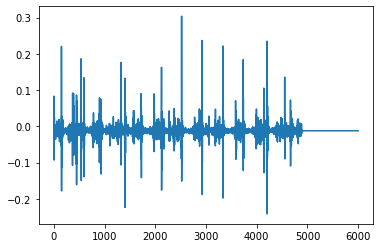

File: [0. 0. 1.], Pred: normal, True: normal


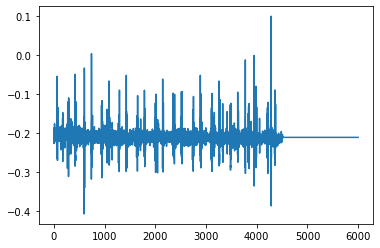

File: [0. 0. 1.], Pred: normal, True: normal


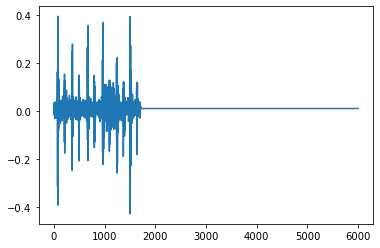

File: [0. 0. 1.], Pred: normal, True: normal


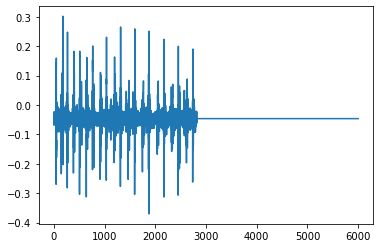

File: [0. 0. 1.], Pred: normal, True: normal


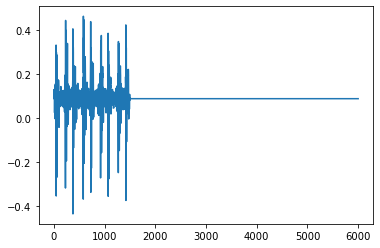

File: [0. 0. 1.], Pred: normal, True: normal


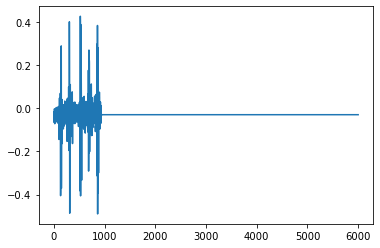

File: [1. 0. 0.], Pred: extra_heart_sound, True: extra_heart_sound


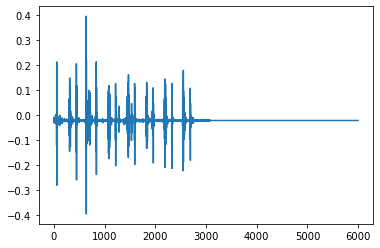

File: [0. 0. 1.], Pred: normal, True: normal


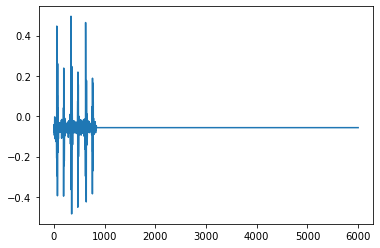

File: [0. 0. 1.], Pred: normal, True: normal


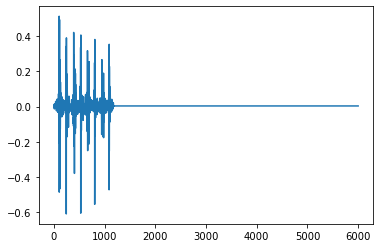

File: [0. 1. 0.], Pred: normal, True: murmur


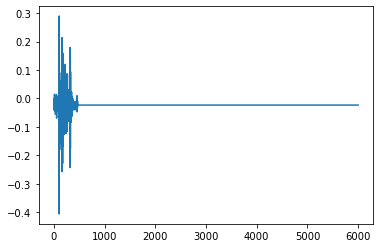

File: [0. 1. 0.], Pred: murmur, True: murmur


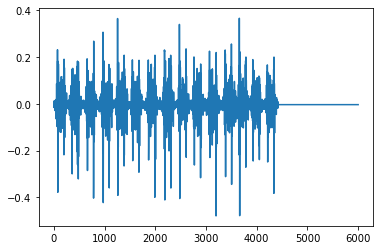

File: [0. 0. 1.], Pred: normal, True: normal


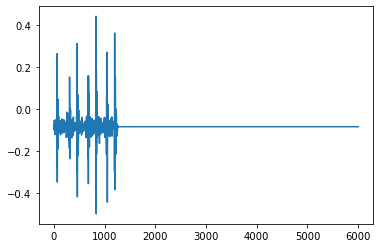

File: [0. 0. 1.], Pred: normal, True: normal


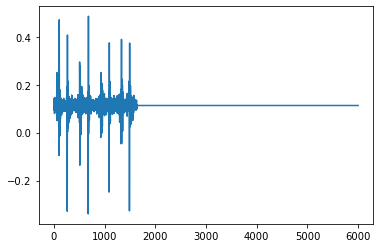

File: [0. 0. 1.], Pred: normal, True: normal


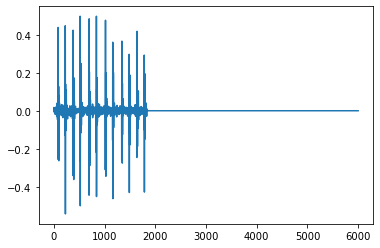

File: [0. 0. 1.], Pred: normal, True: normal


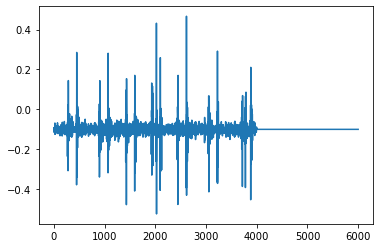

File: [0. 0. 1.], Pred: normal, True: normal


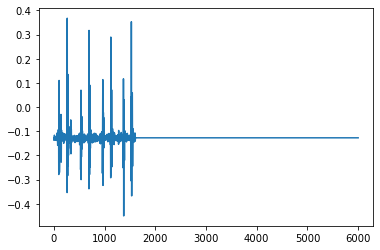

File: [0. 0. 1.], Pred: normal, True: normal


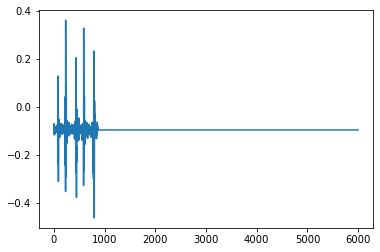

File: [0. 1. 0.], Pred: normal, True: murmur


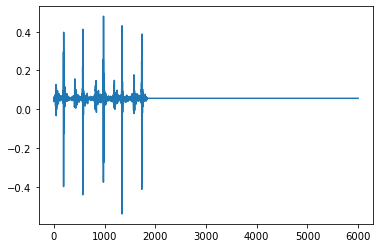

File: [0. 1. 0.], Pred: murmur, True: murmur


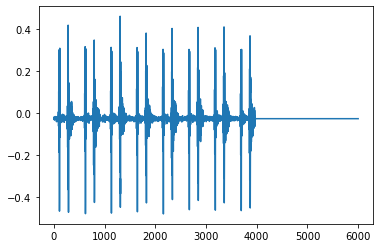

File: [0. 0. 1.], Pred: normal, True: normal


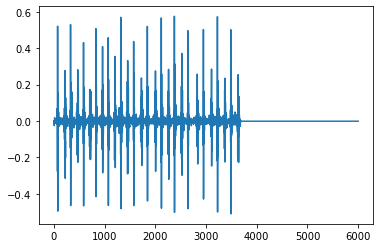

File: [0. 0. 1.], Pred: normal, True: normal


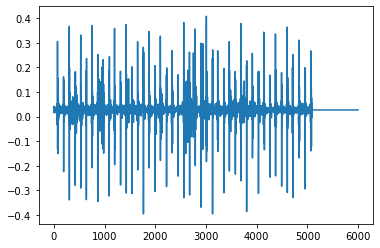

File: [0. 0. 1.], Pred: normal, True: normal


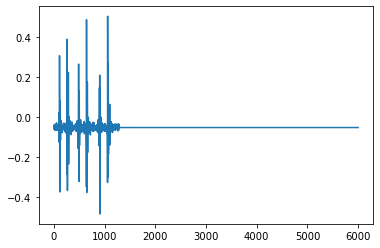

File: [0. 0. 1.], Pred: normal, True: normal


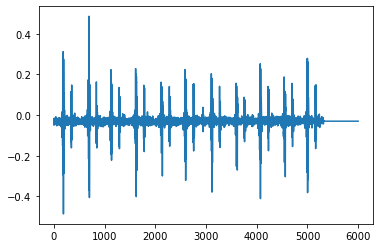

File: [0. 0. 1.], Pred: normal, True: normal


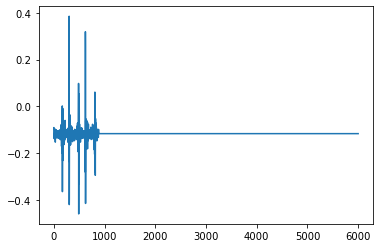

File: [0. 1. 0.], Pred: murmur, True: murmur


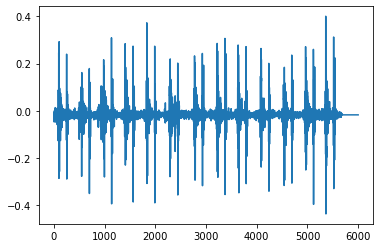

File: [0. 1. 0.], Pred: murmur, True: murmur


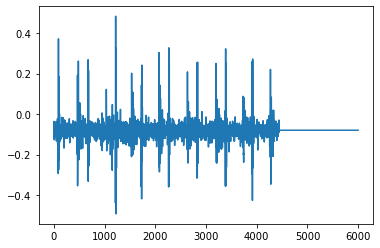

File: [0. 0. 1.], Pred: normal, True: normal


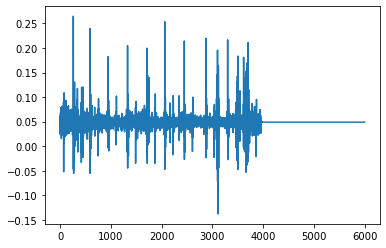

File: [0. 0. 1.], Pred: normal, True: normal


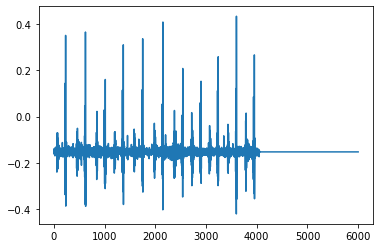

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


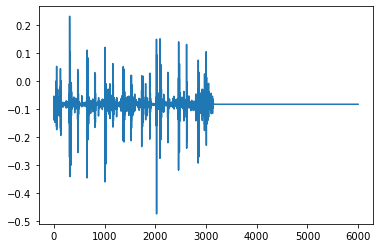

File: [0. 0. 1.], Pred: normal, True: normal


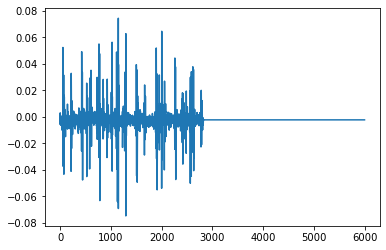

File: [0. 0. 1.], Pred: normal, True: normal


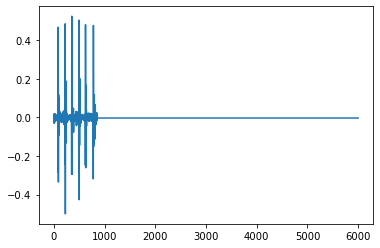

File: [0. 0. 1.], Pred: normal, True: normal


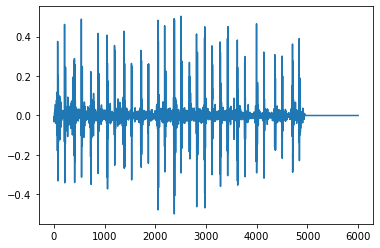

File: [0. 0. 1.], Pred: normal, True: normal


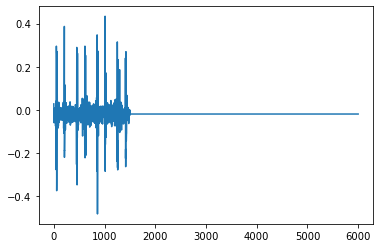

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


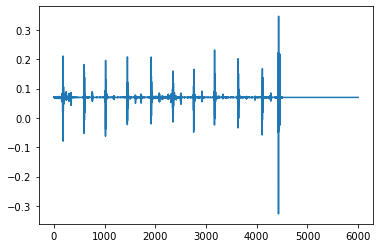

File: [0. 0. 1.], Pred: normal, True: normal


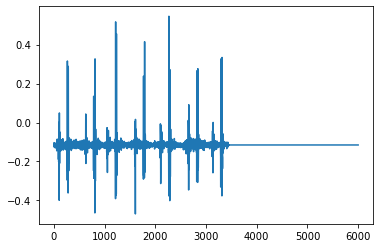

File: [0. 0. 1.], Pred: normal, True: normal


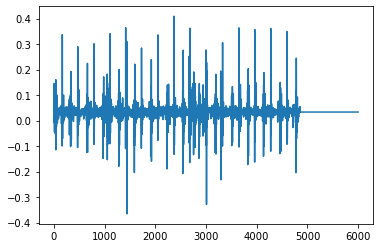

File: [0. 1. 0.], Pred: murmur, True: murmur


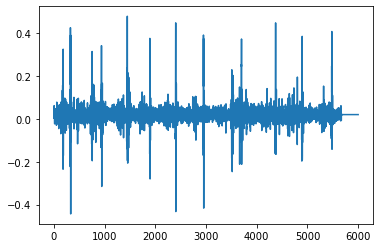

File: [0. 0. 1.], Pred: normal, True: normal


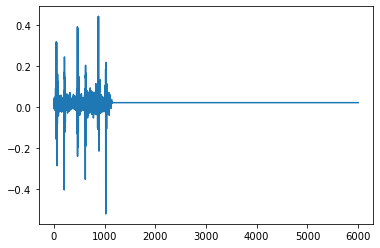

File: [0. 0. 1.], Pred: normal, True: normal


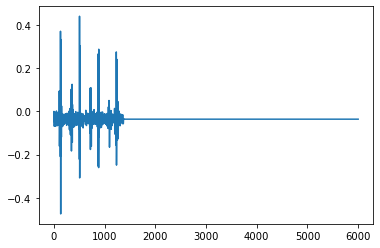

File: [0. 0. 1.], Pred: normal, True: normal


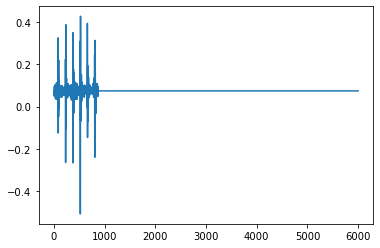

File: [0. 1. 0.], Pred: extra_heart_sound, True: murmur


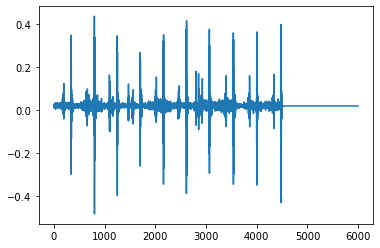

File: [0. 0. 1.], Pred: normal, True: normal


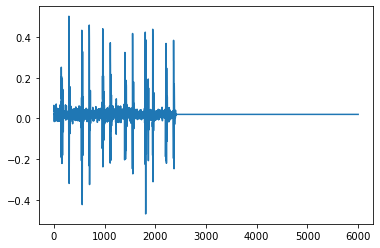

File: [0. 0. 1.], Pred: normal, True: normal


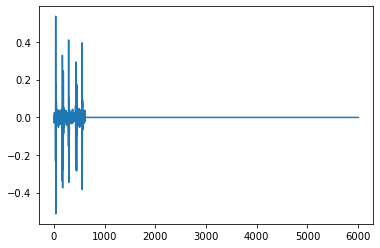

File: [0. 0. 1.], Pred: normal, True: normal


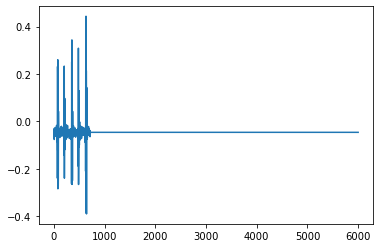

File: [0. 1. 0.], Pred: normal, True: murmur


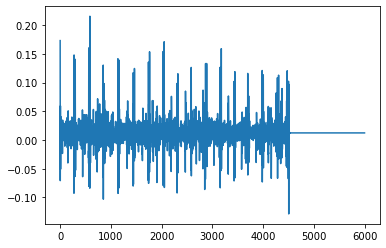

File: [0. 0. 1.], Pred: normal, True: normal


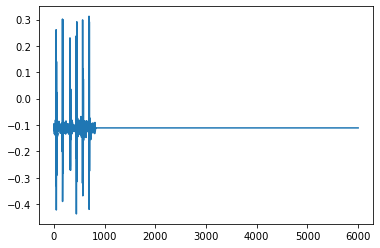

File: [0. 1. 0.], Pred: normal, True: murmur


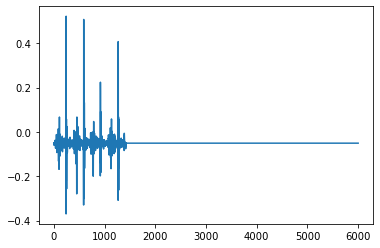

File: [0. 0. 1.], Pred: normal, True: normal


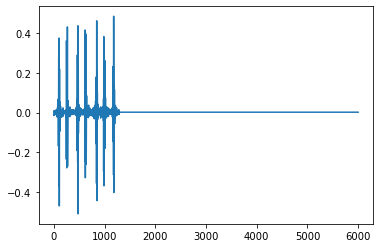

File: [0. 0. 1.], Pred: normal, True: normal


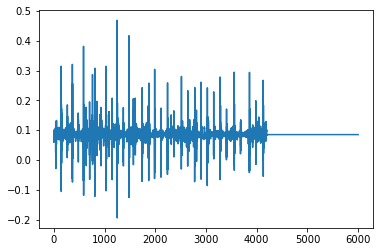

File: [0. 1. 0.], Pred: murmur, True: murmur


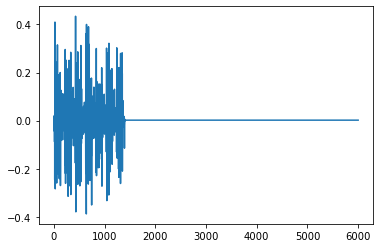

File: [0. 0. 1.], Pred: normal, True: normal


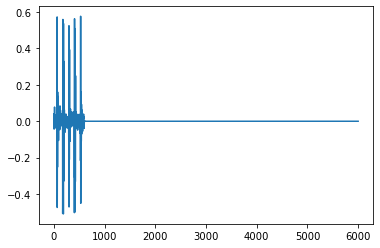

File: [0. 1. 0.], Pred: normal, True: murmur


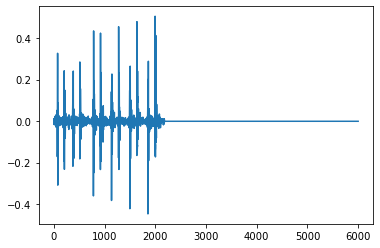

File: [0. 0. 1.], Pred: normal, True: normal


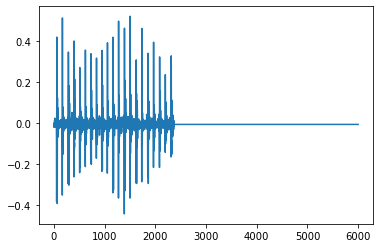

File: [0. 0. 1.], Pred: normal, True: normal


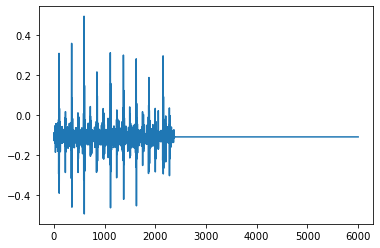

File: [0. 0. 1.], Pred: normal, True: normal


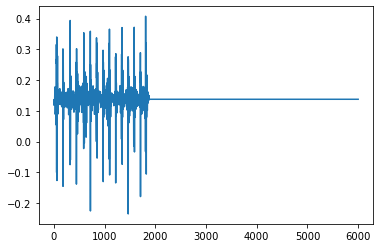

File: [0. 0. 1.], Pred: murmur, True: normal


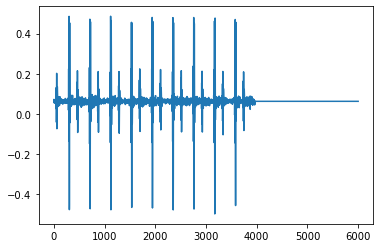

File: [0. 1. 0.], Pred: murmur, True: murmur


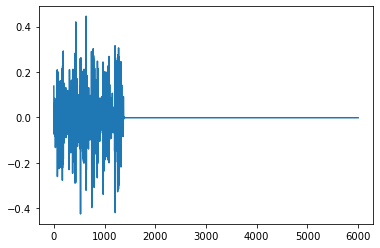

File: [0. 0. 1.], Pred: normal, True: normal


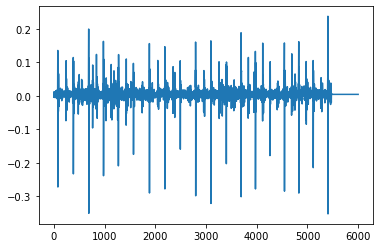

File: [0. 0. 1.], Pred: normal, True: normal


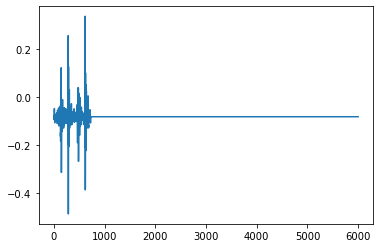

File: [0. 0. 1.], Pred: normal, True: normal


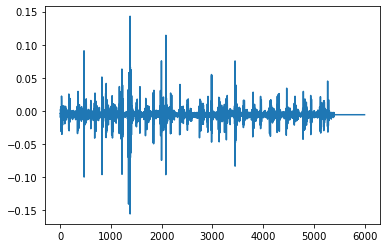

File: [0. 0. 1.], Pred: extra_heart_sound, True: normal


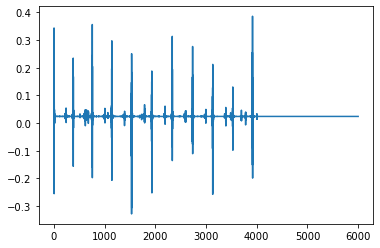

File: [0. 1. 0.], Pred: murmur, True: murmur


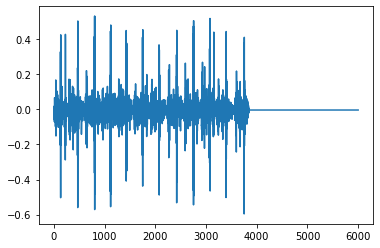

In [60]:
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(Y_test, axis=1)
for i in range(len(y_true)):
    print("File: {}, Pred: {}, True: {}".format(
        Y_test[i],
        CLASSES[y_pred[i]], CLASSES[y_true[i]]))
    plt.plot(x_test[i])
    plt.show()

In [61]:
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(Y_test, axis=1)
count=0
count1=0
for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        count=count+1
print("Number of samples that were predicted incorrectly: ",count)
for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
        count1=count1+1
print("Number of samples that were predicted correctly: ",count1)

Number of samples that were predicted incorrectly:  15
Number of samples that were predicted correctly:  85


In [62]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
print ("actual test return :",y_test[1], "-", int_to_label[y_test[1]])
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

actual test return : 2 - normal
prediction test return : 2 - normal


In [63]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.92      0.52      0.67        23
           2       0.88      0.95      0.91        76

    accuracy                           0.85       100
   macro avg       0.67      0.82      0.64       100
weighted avg       0.88      0.85      0.85       100

[[ 1  0  0]
 [ 1 12 10]
 [ 3  1 72]]


Text(33.0, 0.5, 'Actual')

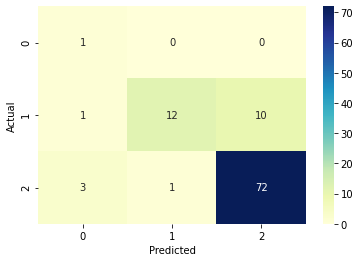

In [64]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm, cmap="YlGnBu", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [65]:
df=pd.DataFrame(columns=['Predicted Labels','Actual Labels'])
df['Predicted Labels']=y_pred.flatten()
df['Actual Labels']=y_test.flatten()
df.head(-1)

Predicted Labels  Actual Labels
0                  2              2
1                  2              2
2                  2              2
3                  2              1
4                  2              2
..               ...            ...
94                 1              1
95                 2              2
96                 2              2
97                 2              2
98                 0              2

[99 rows x 2 columns]